## 身高体重进行性别分类

In [21]:
import numpy as np
from matplotlib import pyplot as plt
X=np.array([
    [158,64],
    [170,66],
    [183,84],
    [191,80],
    [155,49],
    [163,59],
    [180,67],
    [158,54],
    [178,77]
])
Y=['male','male','male','male','female','female','female','female','female']


绘制出数据表示

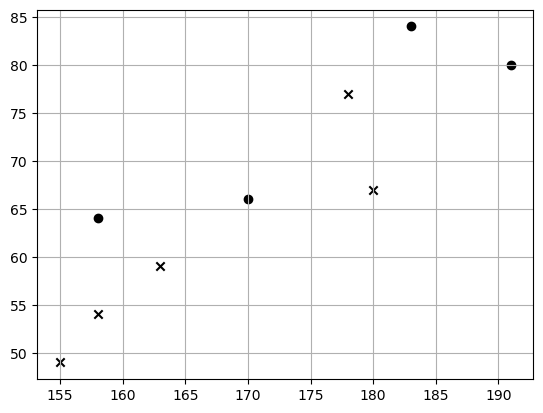

In [22]:
plt.figure()
for i, x in enumerate(X):
    plt.scatter(x[0],x[1],c='k',marker='o' if Y[i]=='male' else 'x')
plt.grid(True)
plt.show()

对身高155，体重70的样本进行预测
- 计量该样本对所有训练集的欧氏距离

In [23]:
X

array([[158,  64],
       [170,  66],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  77]])

In [24]:
x_test=np.array([155,70])
distance=[]
for i in range(len(X)):
    distance.append(np.sqrt(np.square(x_test[1]-X[i,1])+np.square(x_test[0]-X[i,0])))

distance

[6.708203932499369,
 15.524174696260024,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 24.041630560342615]

In [25]:
distance=np.array(distance)
nearest_neighbor_indices = distance.argsort()[:3] 
nearest_neighbor_genders = np.take(Y, nearest_neighbor_indices) 
nearest_neighbor_genders

array(['male', 'female', 'male'], dtype='<U6')

In [26]:
from collections import Counter 
b = Counter(np.take(Y, distance.argsort()[:3])) 
b.most_common(1)[0][0]

'male'

最终预测为男性，可能是初始数据有问题

In [27]:
# 使用sklearn工具进行处理
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

# 将性别标签编码为向量 
lb=LabelBinarizer()
y_train_binarized=lb.fit_transform(Y)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [28]:
K=6
clf=KNeighborsClassifier(n_neighbors=K)
clf.fit(X,y_train_binarized.reshape(-1))
predictions_binarized=clf.predict(np.array([155,70]).reshape(1,-1))
predictions_binarized

array([0])

In [29]:
prediction=lb.inverse_transform(predictions_binarized)
prediction

array(['female'], dtype='<U6')

在考虑了6个邻居的条件下做出了正确的预测

现在，对刚刚训练的这个模型做一个评估

In [30]:
x_test=np.array([
    [168,65],
    [170,61],
    [160,53],
    [169,67]
])
y_test=['male','male','female','female']

In [31]:
y_test_binarized=lb.transform(y_test)
predictions_binarized=clf.predict(x_test)
print(f'prediction binarized: {predictions_binarized}')
print(f'prediction {lb.inverse_transform(predictions_binarized)}')
print(f'the score of this model is {clf.score(x_test,y_test)}')

prediction binarized: [0 0 0 0]
prediction ['female' 'female' 'female' 'female']
the score of this model is 0.0
